**Table of contents**<a id='toc0_'></a>    
- [Import Statements](#toc1_1_)    
- [Getting to know your data](#toc2_)    
  - [*Initial exploration*](#toc2_1_)    
  - [*Data validation*](#toc2_2_)    
  - [*Data summarization*](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import Statements](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc2_'></a>[Getting to know your data](#toc0_)

### <a id='toc2_1_'></a>[*Initial exploration*](#toc0_)

- Take a quick look at the data with `.head()`

- Take a look at some other informations about the dataframe with `.info()`, `.shape`, `.dtypes()`, `.columns` etc.

- For categorical variables, a common question we might ask ourselves is how many data points do we have for each of the category? This can be done with `.value_counts()`.

- Get a quick overview of the numerical variables with `.describe()`.

- To see how the numerical variables are distributed use a `histogram/kdeplot/boxplot/violinplot/boxenplot`. After you've got a good grip about what the data is about, you can use `jointplot/pairplot` to further understand the relationship between the variables.

In [2]:
unemployment = pd.read_csv("./datasets/clean_unemployment.csv")

In [3]:
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [4]:
unemployment.shape

(182, 15)

In [5]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [6]:
unemployment.continent.value_counts()

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64

In [7]:
unemployment.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


For quick plotting you can use pandas plotting functions like `df.plot(kind='hist')` or `df.plot(kind='box')`. For more advanced plotting, you can use `matplotlib` or `seaborn`.

<Axes: xlabel='2021', ylabel='Count'>

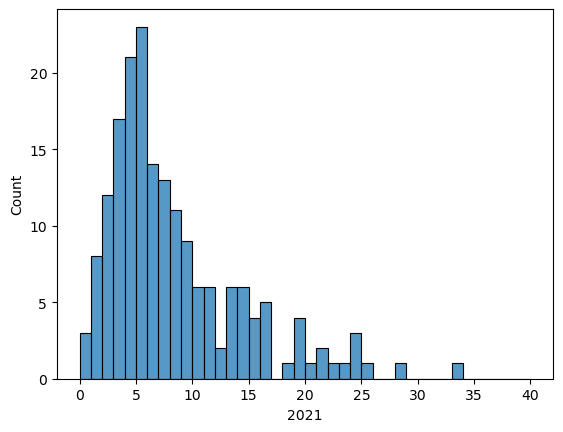

In [8]:
sns.histplot(data=unemployment, x="2021", binrange=(0, 40), binwidth=1)

### <a id='toc2_2_'></a>[*Data validation*](#toc0_)

Data validation is the process of ensuring that the data is clean, correct and useful. It is a good practice to validate the data before you start working on it. This will save you a lot of time and effort in the long run.

- Check the datatypes with `.dtypes` and make sure they are correct. If not, convert them to the correct datatype with `.astype()`.

- For validating categorical variables: to confirm that the categories are as expected use `.unique()` or `.value_counts()`. We can also use `.isin()` to check if the values are in a list of expected values. This can also be used as a filter. We can also use the `~` operator to negate the logic of the filter.

- For validating numerical variables: use `.describe()` to get the summary statistics in a tabular format. We can also draw a `boxplot` to see the summary statistics visually. To select only the numeric columns of a dataframe use, `.select_dtypes("number")`.

<Axes: xlabel='2021', ylabel='continent'>

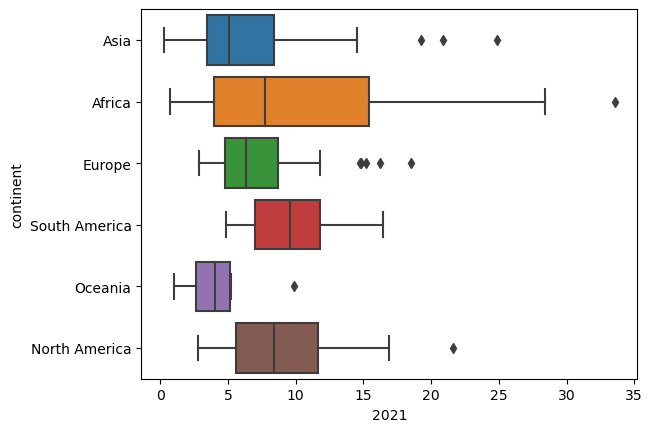

In [9]:
sns.boxplot(data=unemployment, x="2021", y="continent")

### <a id='toc2_3_'></a>[*Data summarization*](#toc0_)

- Use `.groupby()` to group the data and then use `.agg()`/`.transform()`/`.filter()` to summarize and explore the dataset. To visually represent the findings we can use a `barplot`.